## Exercises for Physical Models for Living Systems, homework 3
Group members:
* Golan Rodrigo 1142802
* Zoppellari Elena 2076715

### Exercise 1

To generate Jacobian matrices for various network structures with connectance $0 < C < 1$, evaluated at a feasible equilibrium point (square matrices $M$ of size $S \times S$, where $S$ is the number of species and $m_{ij}$ are the matrix values), we've implemented the function `rM()`. This function allows the selection of a random configuration or an ecological structure (mutualistic, predator-prey, or competitive-mutualistic). It populates the diagonal with values of $-d$ and fills the non-diagonal elements with values sampled from a Gaussian probability distribution $\mathcal{N}(0, \sigma)$ according to the following rules:

* given a random value $p$ sampled from a uniform distribution $\mathcal{U}(0,1)$:

    * If $p > C$: Set $m_{ij} = m_{ji} = 0$ for all network elements.
    * If $p \leq C$:
        * *random networK*: $m_{ij}$ and $m_{ji}$ are sampled from $\mathcal{N}(0, \sigma)$.
        * *mutualistic network*: $m_{ij}$ and $m_{ji}$ are sampled from $|\mathcal{N}(0, \sigma)|$.
        * *predator-prey network*: Another value $p_2$ is sampled from $\mathcal{U}(0,1)$. If $p_2 \leq 0.5$, $m_{ij}$ is sampled from $|\mathcal{N}(0, \sigma)|$ while $m_{ji}$ is sampled from $-|\mathcal{N}(0, \sigma)|$. If $p_2 > 0.5$, the contrary.
        * *competitive-mutualistic network*: Another value $p_2$ is sampled from $\mathcal{U}(0,1)$. If $p_2 \leq 0.5$, both $m_{ij}$ and $m_{ji}$ are sampled from $|\mathcal{N}(0, \sigma)|$. Otherwise, they are sampled from $-|\mathcal{N}(0, \sigma)|$.


In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib import patches
from brokenaxes import brokenaxes

In [4]:
def rM(size, d, C, D, parameters, eco_struct = "random"):
    '''
    this function return a square matrix given:
    - size: the number of species
    - d: the value on the diagonal, d>0
    - C: the connectance, 0<C<1
    - D: the distribution from which sample the non-zeros values of the matrix
    - parameters: dictionary with the parameters of the distribution
    - eco_struct: chosen network between "random", "mutualistic", "predprey" or "competmutual"
    
    '''
    
    assert d>0, 'diag  must be >0'
    assert 0<C<1, 'connectance must be between 0 and 1'
    
    # initialize matrix
    M = np.zeros((size, size))
    
    # off-diagonal elements
    for i in range(size):
        for j in range(i+1, size):
            p = np.random.uniform()
            if p <= C:
                if eco_struct=="random":
                    M[i, j] = D(**parameters)
                    M[j, i] = D(**parameters)
                elif eco_struct=="mutualistic":
                    M[i, j] = np.abs(D(**parameters))
                    M[j, i] = np.abs(D(**parameters))
                else:
                    p2=np.random.uniform()
                    if p2 <= 0.5:
                        if eco_struct=="predprey":
                            val = np.abs(D(**parameters))
                            M[i, j] = np.abs(D(**parameters))
                            M[j, i] = -np.abs(D(**parameters))
                        elif eco_struct=="competmutual":
                            M[i, j] = np.abs(D(**parameters))
                            M[j, i] = np.abs(D(**parameters))
                    else:
                        if eco_struct=="predprey":
                            val = np.abs(D(**parameters))
                            M[i, j] = -np.abs(D(**parameters))
                            M[j, i] = np.abs(D(**parameters))
                        elif eco_struct=="competmutual":
                            M[i, j] = -np.abs(D(**parameters))
                            M[j, i] = -np.abs(D(**parameters))
            else:
                M[i, j] = 0.0
                M[j, i] = 0.0

    # diagonal elements
    np.fill_diagonal(M, -d)

    return M

The matrices have been generated for all four possible networks and computed for four different numbers of species $S=[20,50,100,200]$, with parameters $d = 1$, $C=0.8$, and $\sigma = 1$. For each possible configuration, the matrix has been sampled $N=5$ times to account for stochasticity, and their eigenvalues have been determined and plotted on the complex plane.

These numerical eigenvalues are then compared with circular (random matrix) and elliptic laws (ecological structures, where the correlation is non-zero).

To begin, the eigenvalues of the random matrices are compared with a circle of radius $r=\sqrt{SC\sigma^2}$ and center $(-d,0)$, confirming adherence to the circular law.

For ecological structures, the comparisons are made with an ellipse having axes $a = \sqrt{SV} (1+\rho)$, $b = \sqrt{SV} (1-\rho)$, and center $(-\rho,0)$, where $V := Var(m_{ij})$ and:
$$
\rho = \dfrac{\mathbb{E}[m_{ij}, m_{ji}] - \mathbb{E}^2[m_{ij}]}{V} \neq 0
$$

Analytic expressions for $a$, $b$, and $\rho$ are obtained for the mutualistic network. In this case, the expected value of $M_{ij}$ is derived from the expected value of the half-normal distribution:
$$
    \mathbb{E}[M_{ij}] = C \cdot\mathbb{E}[X]\bigr|_{X\sim |\mathcal{N}(0, \sigma^2)|} = C \cdot \frac{2\sigma}{\sqrt{2\pi}}
$$

Similarly, it is possible to compute $\mathbb{E}[M_{ij}, M_{ji}]$:
$$
    \mathbb{E}[M_{ij}, M_{ji}] = C \cdot\mathbb{E}^2[X]\bigr|_{X\sim |\mathcal{N}(0, \sigma^2)|} = C \cdot \frac{2\sigma^2}{\pi}
$$

Finally, we can get also the variance of $M_{ij}$:
$$
    Var(M_{ij}) = \mathbb{E}[M^2_{ij}] - \mathbb{E}^2[M_{ij}] = C\left[\sigma^2-C\cdot\frac{2\sigma^2}{\pi}\right] = C\sigma^2\left(1-\frac{2C}{\pi}\right)
$$

Having all these quantities, we can derive the correlation $\rho$ and the semi-axes of the ellipse:
$$
\begin{align}
    &\rho = \frac{\mathbb{E}[M_{ij}, M_{ji}] - \mathbb{E}^2[M_{ij}]}{Var(M_{ij})} = \frac{C \cdot\frac{2\sigma^2}{\pi} - C^2 \cdot\frac{2\sigma^2}{\pi}}{C\cdot\sigma^2 \left(1-\frac{2C}{\pi} \right)} = \frac{1 - C}{\frac{\pi}{2}-C}\\
    &a = \sqrt{SV}(1 +\rho) = \sqrt{SC\sigma^2 \left( 1 - \frac{2C}{\pi} \right)} \cdot\left(1 + \frac{1-C}{\frac{\pi}{2}-C}\right) \\
    &b = \sqrt{SV}(1 -\rho) = \sqrt{SC\sigma^2 \left( 1 - \frac{2C}{\pi} \right)} \cdot\left(1 - \frac{1-C}{\frac{\pi}{2}-C}\right) 
\end{align}
$$

For predator-prey and competitive-mutualistic networks, analytical derivations are not as straightforward, so for these cases, $\mathbb{E}[M_{ij}]$ is empirically calculated from the matrix elements.
The results confirm the elliptic law. The outliers' coordinates are reported in the legend.

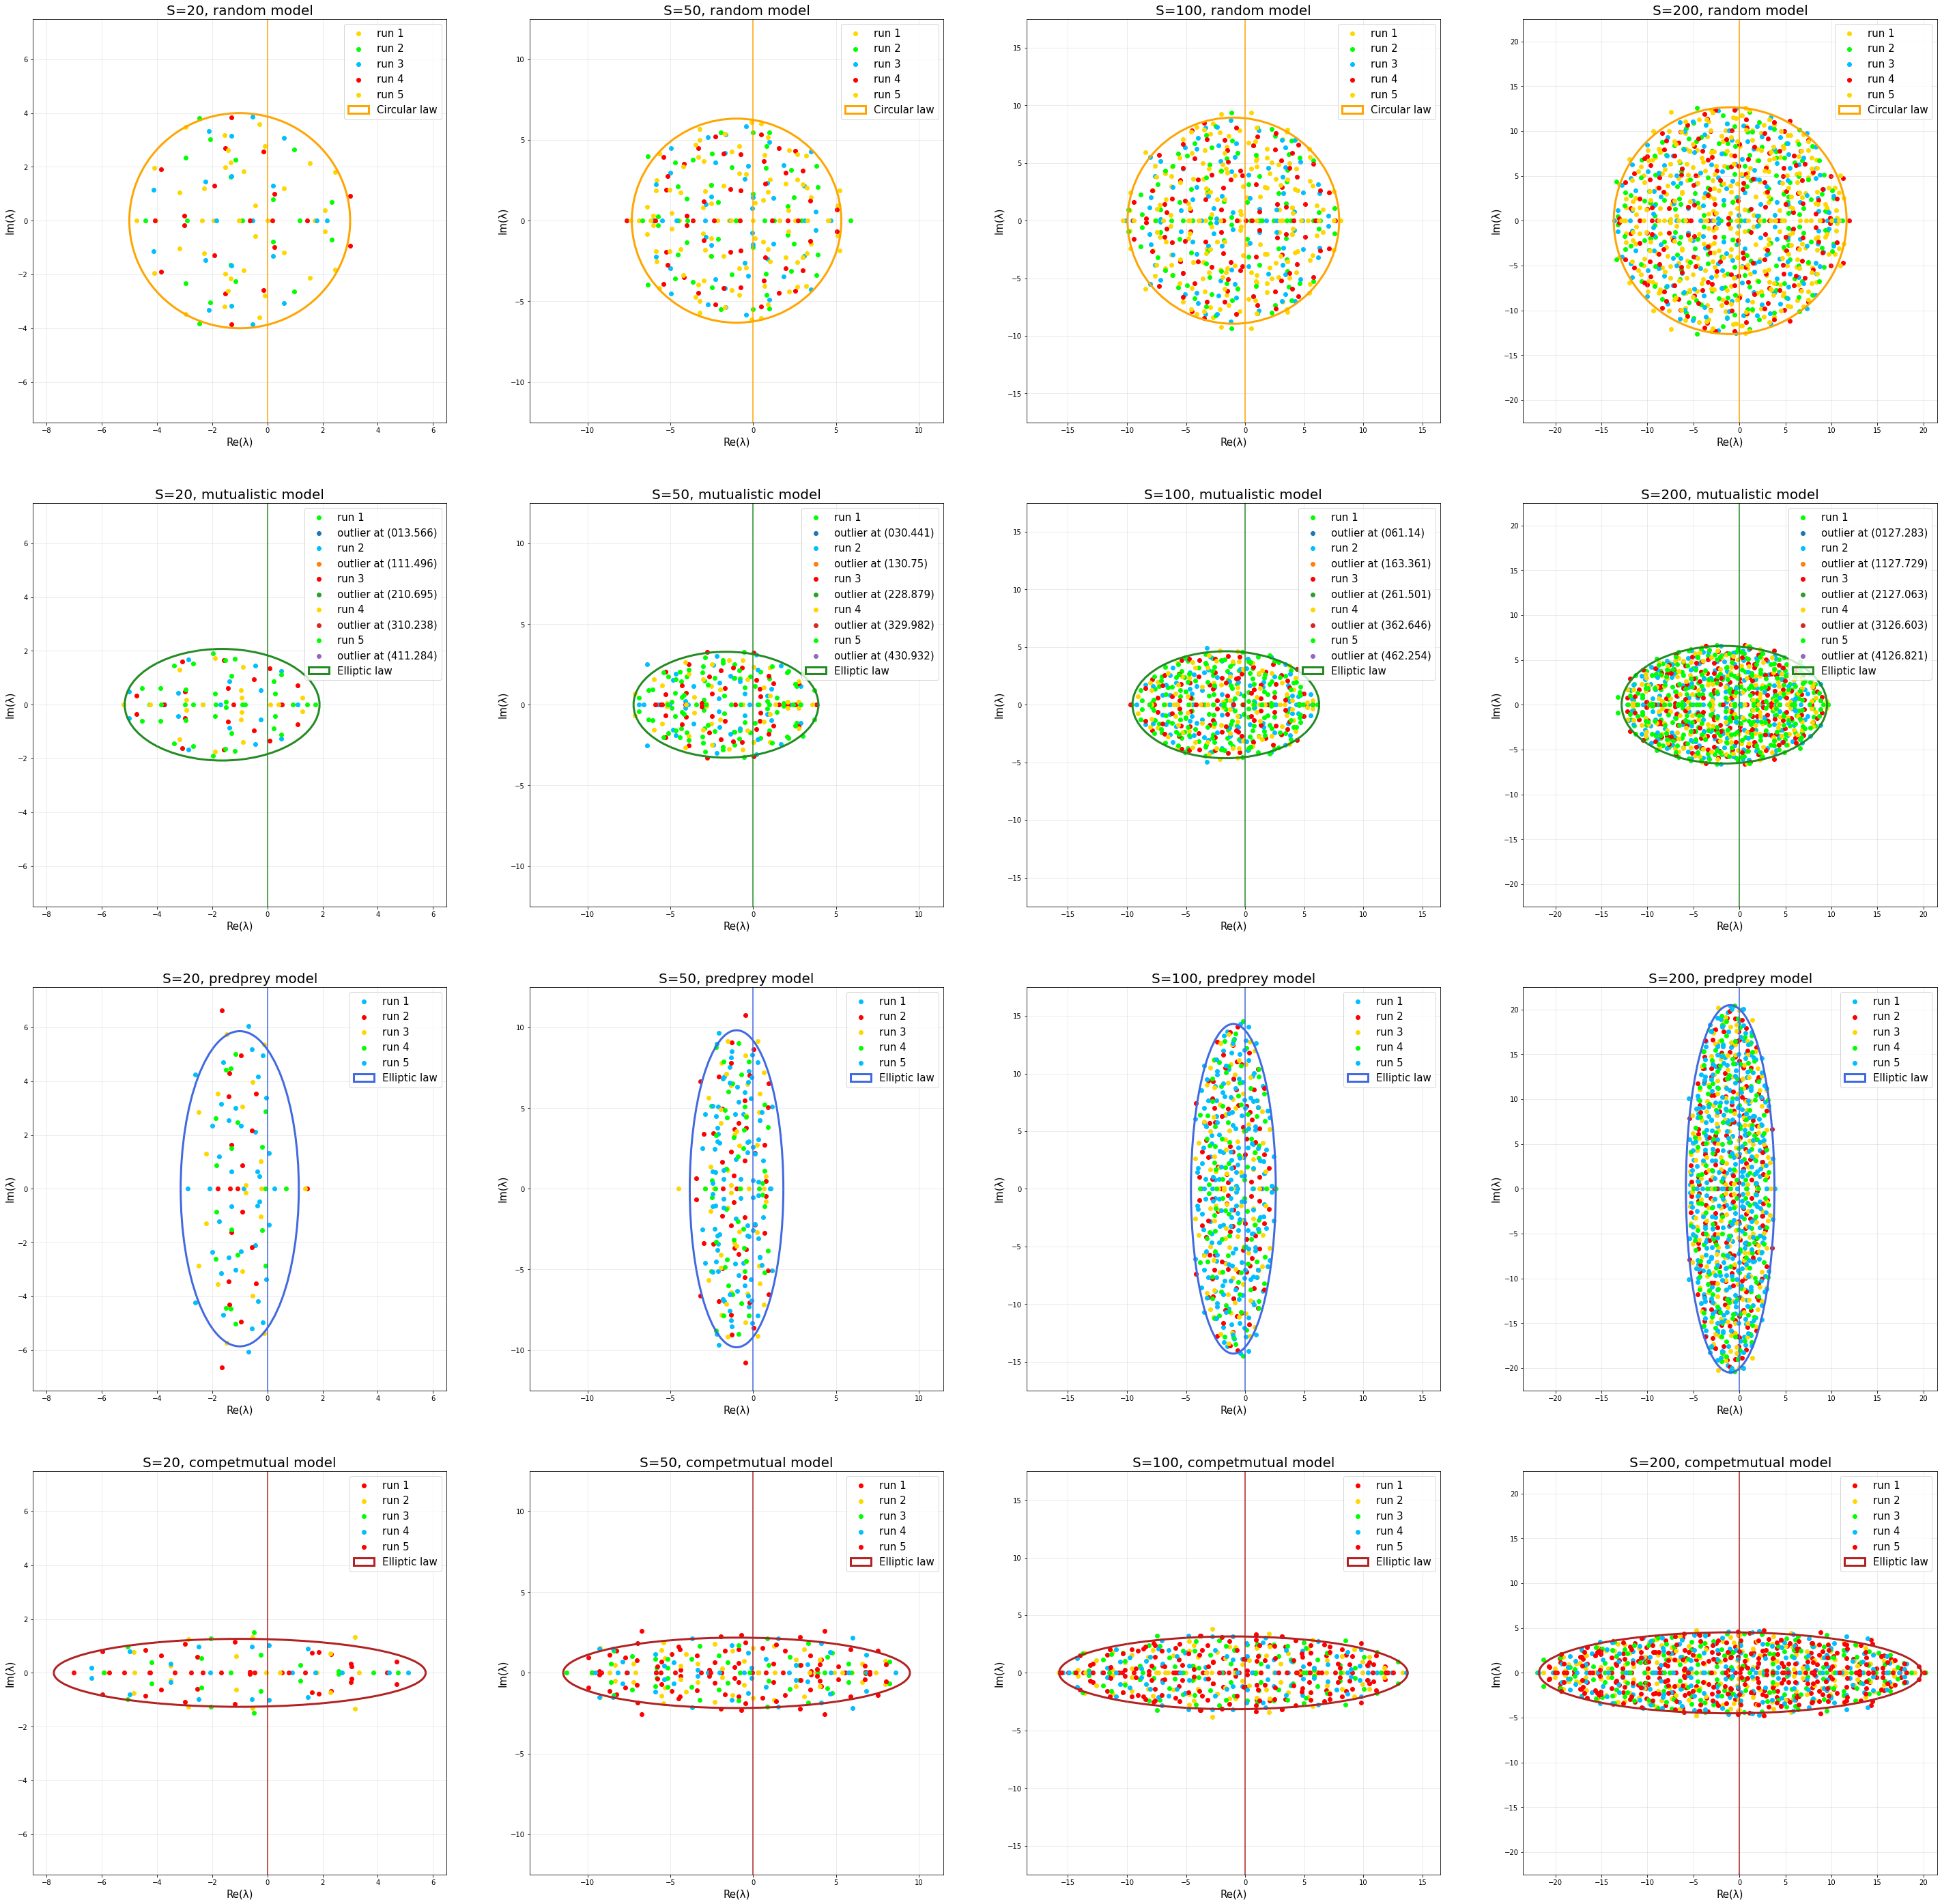

In [9]:
fig, axes = plt.subplots(nrows=4,ncols=4, figsize=(50,50))
S = [20,50,100,200]
eco_s = ["random", "mutualistic", "predprey", "competmutual"]
colors = ["gold", "lime", "deepskyblue", "red"]
col = ["orange", "forestgreen", "royalblue", "firebrick"]
d = 1
C = 0.8
D = np.random.normal # gaussian distribution
std = 1.0
param={'loc': 0, 'scale': std}
N = 5

for i, s in enumerate(S):
    matrix = np.zeros((len(eco_s),N)) # matrix to collect correlation values
    for n in range(N):
        for j, e in enumerate(eco_s):
            M = rM(s, d, C, D, param, e)
            # collect correlations for each trial n and model e
            matrix[j][n] = np.mean((M*M.T)[np.triu_indices(M.shape[0])])/(C*std**2)
            # compute eigenvalues
            eigen_v, _ = np.linalg.eig(M)
            # plot eigenvalues
            axes[j%4][i%4].scatter(np.real(eigen_v), np.imag(eigen_v), color=colors[(j+n)%4], label="run {}".format(n+1))
            axes[j%4][i%4].set_xlim(left=-(8.5+i*5), right=(6.5+i*5))
            axes[j%4][i%4].set_ylim(bottom=-(7.5+i*5), top=(7.5+i*5))
            if e == eco_s[0]:
                ellipse = patches.Circle((-d,0),np.sqrt(s*C*std**2), fill=False, linewidth=3, 
                color = col[0], label='Circular law')
                # calculate roughly the outliers (they should be outside the figure, not in the neighbour)
                out_r = np.real(eigen_v)[np.sqrt(np.real(eigen_v)**2+np.imag(eigen_v)**2) > 3*np.sqrt(s*C*std**2)]
                out_i = np.imag(eigen_v)[np.sqrt(np.real(eigen_v)**2+np.imag(eigen_v)**2) > 3*np.sqrt(s*C*std**2)]
                if len(out_r) > 0:
                    axes[j%4][i%4].scatter(out_r,out_i, label="outlier at ({}{})".format(n, round(out_r[0],3), round(out_i[0],3), color=colors[(j+n)%4]))
            elif e == eco_s[1]: # mutualistic
                # here we can implement the analytical formulas to plot the ellipse
                V = C * std**2 * (1 - (2*C)/ np.pi)
                rho =(1-C)/((np.pi/2) - C)
                ellipse = patches.Ellipse(xy = (-d - C * (2 * std)/ np.sqrt(2 * np.pi), 0),
                                        width = 2 * np.sqrt(s*V)*(1 + rho),
                                        height = 2 * np.sqrt(s*V)*(1 - rho), 
                                        color = col[1], fill=False, linewidth=3, label='Elliptic law')
                out_r = np.real(eigen_v)[np.real(eigen_v)**2/(np.sqrt(s*V)*(1 + rho))**2+np.imag(eigen_v)**2/(np.sqrt(s*V)*(1 - rho))**2 > 3]
                out_i = np.imag(eigen_v)[np.real(eigen_v)**2/(np.sqrt(s*V)*(1 + rho))**2+np.imag(eigen_v)**2/(np.sqrt(s*V)*(1 - rho))**2 > 3]
                if len(out_r) > 0:
                    axes[j%4][i%4].scatter(out_r,out_i, label="outlier at ({}{})".format(n, round(out_r[0],3), round(out_i[0],3), color=colors[(j+n)%4]))
            elif e == eco_s[2]: # predatory pray
                rho = matrix[2][:].mean()
                r = np.sqrt(s*C*std**2)
                ellipse = patches.Ellipse(xy = (-d, 0),
                                        width =  r*(1+rho)*2,
                                        height = r*(1-rho)*2, 
                                        color = col[2], fill=False, linewidth=3, label='Elliptic law')
                out_r = np.real(eigen_v)[np.real(eigen_v)**2/(r*(1+rho))**2+np.imag(eigen_v)**2/(r*(1-rho))**2 > 3]
                out_i = np.imag(eigen_v)[np.real(eigen_v)**2/(r*(1+rho))**2+np.imag(eigen_v)**2/(r*(1-rho))**2 > 3]
                if len(out_r) > 0:
                    axes[j%4][i%4].scatter(out_r,out_i, label="outlier at ({}{})".format(n, round(out_r[0],3), round(out_i[0],3), color=colors[(j+n)%4]))
            elif e == eco_s[3]: # comp_mutualistic
                rho = matrix[3][:].mean()
                r = np.sqrt(s*C*std**2)
                ellipse = patches.Ellipse(xy = (-d, 0),
                                        width =  r*(1+rho)*2,
                                        height = r*(1-rho)*2, 
                                        color = col[3], fill=False, linewidth=3, label='Elliptic law')
                out_r = np.real(eigen_v)[np.real(eigen_v)**2/(r*(1+rho))**2+np.imag(eigen_v)**2/(r*(1-rho))**2 > 3]
                out_i = np.imag(eigen_v)[np.real(eigen_v)**2/(r*(1+rho))**2+np.imag(eigen_v)**2/(r*(1-rho))**2 > 3]
                if len(out_r) > 0:
                    axes[j%4][i%4].scatter(out_r,out_i, label="outlier at ({}{})".format(n, round(out_r[0],3), round(out_i[0],3), color=colors[(j+n)%4]))
            if n==4:
                axes[j%4][i%4].set_title("S={}, {} model".format(s,e),fontsize=20)
                axes[j%4][i%4].set_xlabel("Re(λ)",fontsize=15)
                axes[j%4][i%4].set_ylabel("Im(λ)",fontsize=15)
                axes[j%4][i%4].add_patch(ellipse)
                axes[j%4][i%4].axvline(0, color=col[j])
            axes[j%4][i%4].legend(fontsize=15)
            axes[j%4][i%4].grid(alpha=0.3) 

From the plots above, we can observe notable distinctions when contrasting the stability of ecological networks against a random configuration. Specifically, **both mutualistic and competitive-mutualistic structures exhibit a descreased degree of stability** when compared to the random scenario, expecially in competitive-mutualistic framework. In contrast to the random configuration, where eigenvalues are uniformly distributed within a disk, these ecological structures display eigenvalues distributed along an elongated ellipse, primarily along the horizontal (real) axis. This indicates that the maximum eigenvalue along the horizontal ellipse is unequivocally greater than its counterpart in the disk, expecially more eigenvalues such that $Re(\lambda) > 0$ signifying that there are more unstable equilibriums. Consequently, these findings imply that the interplay of competition and mutualism within ecosystems renders the system less stable than the fully general random configuration.

Shifting our focus to the predator-prey structure, a distinct pattern emerges with the ellipse stretched predominantly along the y-axis. This suggests that **the dynamics of interaction between predators and prey contribute significantly to improve stability within ecosystems**.

However, it is observed the persistence of the complexity-stability paradox. As the complexity of the system increases, the probability of instability expands, underscoring the intricate interplay between ecological complexity and stability.

### Exercise 2

In the general setting where $V=Var(M_{ij})$ and $C\mu=\mathbb{E}[M_{ij}]$, the maximum eigenvalue $\lambda_{max}$ is given by:
$$
    \lambda_{max} = max\left\{\sqrt{SCV}(1\pm\rho)-C\mu-d \quad , \quad (S-1)C\mu-d \right\}
$$

In the **mutualistic** case these calculations can be made analytically with more ease since the distribution which is used to sample the matrix values is (with probability $C$) the half-normal.

Using the quantities derived in the previous exercise and the fact that $\rho>0$, the expression for the maximum eigenvalue becomes:
$$
    \lambda_{max} = max\left\{\sqrt{SC\sigma^2\left(1-\frac{2C}{\pi}\right)}\left(1+\frac{1 - C}{\frac{\pi}{2}-C}\right)-C \frac{2\sigma}{\sqrt{2\pi}}-d \quad , \quad (S-1)C \frac{2\sigma}{\sqrt{2\pi}}-d \right\}
$$

In plot below we can observe the scaling of the maximum eigenvalue for **all types of interaction**: *random, mutualistic, prey-predator* and *mixture of competition and mutualism*. **It should be noted that the y axis is broken**, so the upper points in fact lie further from the rest: this means that the *mutualistic* interaction is the least stable, as expected. The *prey-predator* interaction is diametrically opposite on the other hand, yielding the stablest solutions. We shall remark that the original *random* interaction is the second in stability, only behind the *prey-predator*.

In [135]:
'''
mutualistic case only since we have derived explicit formulas
'''
def predict_lambda_max(species, return_type="max"): 
    sigma=param["scale"]
    ellipse_ = np.sqrt(species*C*sigma**2*(1-2*C/np.pi))*(1+(1-C)/(np.pi/2-C))-C*2*sigma/np.sqrt(2*np.pi)-d
    outlier_ = (species-1)*C*2*sigma/np.sqrt(2*np.pi)-d
    if return_type=="ellipse":
        return ellipse_
    elif return_type=="outlier":
        return outlier_
    else:
        return np.max([ellipse_, outlier_])

Text(0, 0.5, '$Max \\, Re(\\lambda)$')

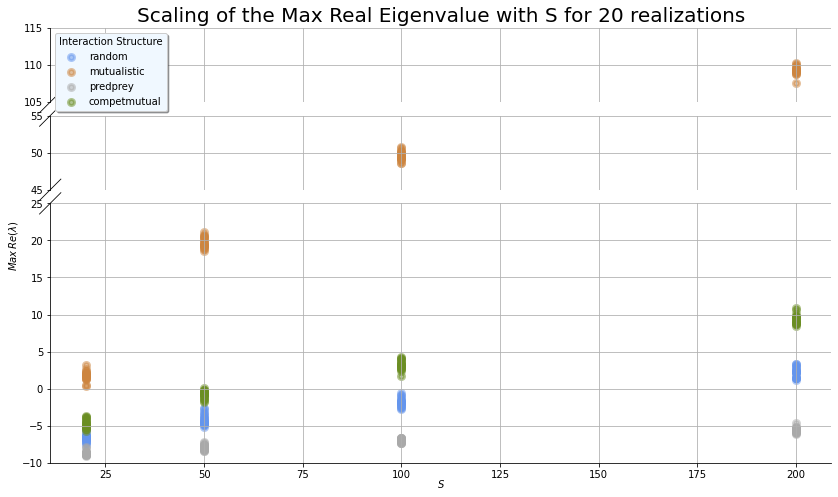

In [178]:
S_vec = np.array([20, 50,100,200])  # number of species
N = 20 
colors=["cornflowerblue", "peru", "darkgrey","olivedrab"]
fig = plt.figure(figsize=(14, 8))
bax = brokenaxes( ylims=((-10, 25),(45,55), (105, 115)), hspace=.1)

for _,eco in enumerate (["random","mutualistic", "predprey","competmutual"] ):
    alpha=0
    for s in S_vec:
        max_eig = []
        for i in range(N):
            M = rM(s, 10, 0.75,np.random.normal, param, eco)
            eig_M = np.linalg.eigvals(M)
            current_maxeig=np.max(np.real(eig_M))
            max_eig.append(current_maxeig)
            if alpha==0:
                bax.scatter(s, current_maxeig, c=colors[_], alpha=0.5, linewidths=3, label=f"{eco}")
                alpha=1
            else:
                bax.scatter(s, current_maxeig, c=colors[_], alpha=0.5, linewidths=3)
bax.set_title(f"Scaling of the Max Real Eigenvalue with S for {N} realizations", fontsize=20)
bax.legend(loc=2, shadow=True, facecolor="aliceblue",title="Interaction Structure")
bax.grid()
bax.set_xlabel("$S$")
bax.set_ylabel("$Max \, Re(\\lambda)$")

We shall also look below at the plot of the probability of stability as a function of the control parameter, comparing the original *random* interaction with the *mutualistic* one for which we derived explicit formulas. For the former we use the control parameter $\frac{\sigma \sqrt{SC}}{d}$, while for the former we use first $\frac{a-C\mu}{d}$, where $a$ is the horizontal semi-axis of the ellipse and then $(S-1)C\mu\,$, the outlier. As we can grasp immediately from the plot, the outlier is the leading term (as maximum eigenvalue) from the get-go and the corresponding plot is quite similar to the *random* case. The maximum eigenvalue from the ellipse on the other hand does not offer good results: it is expected because of the dominance of the linear term in $S$ over $\sqrt{S}$.

CPU times: total: 8min 43s
Wall time: 6min 4s


Text(0.5, 1.0, 'Mutualistic structure (vs OUTLIER)')

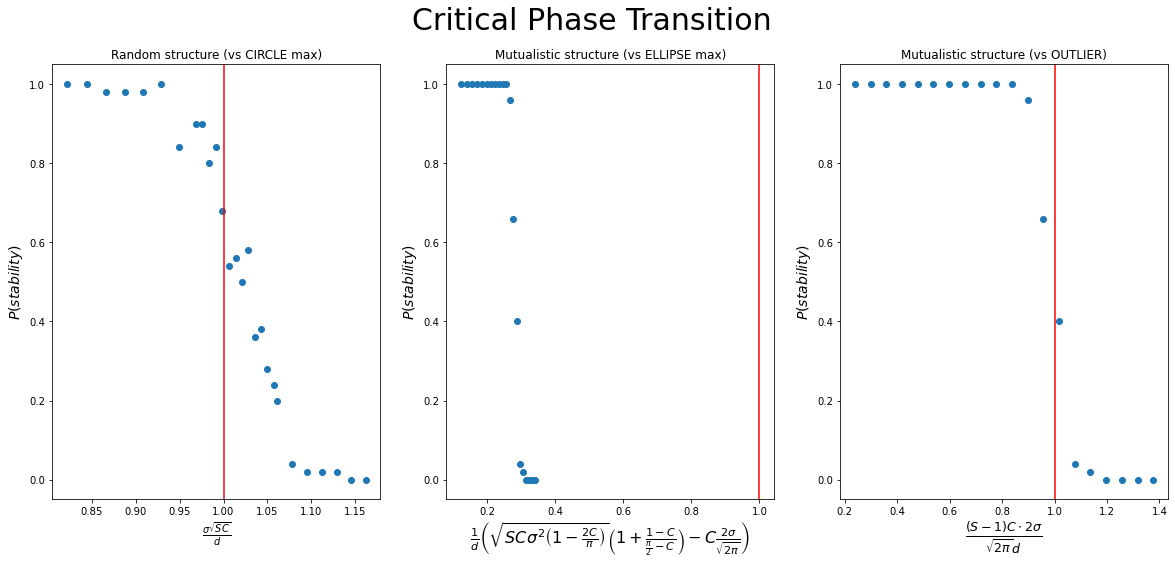

In [176]:
%%time
fig,ax=plt.subplots(nrows=1, ncols=3, figsize=(20,8))
fig.suptitle("Critical Phase Transition", fontsize=30)

S_range= np.concatenate((np.arange(90,125,5),np.arange(125,150,2), np.arange(150,185,5)))
N=50
stable=np.ones((len(S_range),N))
prob=[]
for _,s in enumerate (S_range):
    for k in range (N):
        
        M = rM(s, d, C,np.random.normal, param)
        eig_M = np.linalg.eigvals(M)
        current_maxeig=np.max(np.real(eig_M))
        if current_maxeig >=0:
            stable[_][k]=0
    prob.append(np.sum(stable[_])/N)
ax[0].scatter(np.sqrt(S_range*C)/d, prob)
ax[0].set_title("Random structure (vs CIRCLE max)")
ax[0].set_xlabel("$\\frac{\\sigma \\sqrt{SC}}{d}$", fontsize=14)

S_range=np.arange(5,25)
#N=2
stable=np.ones((len(S_range),N))
prob=[]
for _,s in enumerate (S_range):
    for k in range (N):
        
        M = rM(s, d, C,np.random.normal, param, "mutualistic")
        eig_M = np.linalg.eigvals(M)
        current_maxeig=np.max(np.real(eig_M))
        if current_maxeig >=0:
            stable[_][k]=0
    prob.append(np.sum(stable[_])/N)
ax[1].set_xlabel("$\\frac{1}{d}\\left(\\sqrt{SC\\sigma^2\\left(1-\\frac{2C}{\\pi}\\right)}\\left(1+\\frac{1 - C}{\\frac{\\pi}{2}-C}\\right)-C \\frac{2\\sigma}{\\sqrt{2\\pi}}\\right)$", fontsize=16)
ax[1].set_title("Mutualistic structure (vs ELLIPSE max)")
ax[1].scatter(predict_lambda_max(S_range,"ellipse")/d+1, prob)

ax[2].scatter(predict_lambda_max(S_range,"outlier")/d+1, prob)
ax[2].set_xlabel("$\\frac{(S-1)C \\cdot 2\\sigma}{\\sqrt{2\\pi}d}$", fontsize=18)
for a in ax:
    a.vlines(1,-1,2,color="red")
    a.set_ylim(-0.05,1.05)
    a.set_ylabel("$P(stability)$", fontsize=14)
ax[2].set_title("Mutualistic structure (vs OUTLIER)")


### Exercise 3 (optional)

We consider the case where $N_i^*$ are drawn from $U(1,10)$ and also $a_i=1$. In this scenario not all matrix elements of $alpha$ are free to be chosen from the distribution $\mathcal{D}$: there is the costraint on 
$$
\sum_{j=1}^S \alpha_{\,i,\,j} N_j^*=a_i=1 \;.
$$
Furthermore now, being $N^*$ not necessarily $1$, 
$$
J_{i,j}=N_i^* \alpha _{i,\,j} \; .
$$
Practically, only $S-1$ elements of the interaction matrix per row can be drawn from $\mathcal{D}$, for example the off diagonal terms, and the remaining is set using the stationarity costraint. Then $J$ is evaluated and multiple ($N=5$) runs can be executed for each value of $S$ to show the behaviour of the eigenvalues. As can be seen in the plot below, the eigenvalues do seem to crowd in an elliptical form, suggesting that maybe (**but maybe not**) the *elliptical law* holds, although with more then one outlier possibily. It is certain on the other hand that the *circular law* **does not** hold.
As for the stability-complexity paradox, the growing of $\lambda$ values with $S$ suggests that it still applies.

In [6]:
def makeM(size, C, D, parameters):
    M= np.zeros((size, size))
    J= np.zeros((size, size))
    N_star=np.random.uniform(1,10, size=size)  
    # 1. off-diagonal elements
    for i in range(size):

        for j in range(i+1, size):
            p = np.random.uniform()
            if p <= C:
                M[i, j] = D(**parameters)
                M[j, i] = D(**parameters)

            else:
                M[i, j] = 0.0
                M[j, i] = 0.0
        M[i, i]= (1 - np.sum(M[i,:i]*N_star[:i]) - np.sum(M[i,i+1:]*N_star[i+1:]))/N_star[i]
    
    for i in range(size):
        for j in range(size):
            J[i,j]=M[i,j]*N_star[i]
    return J

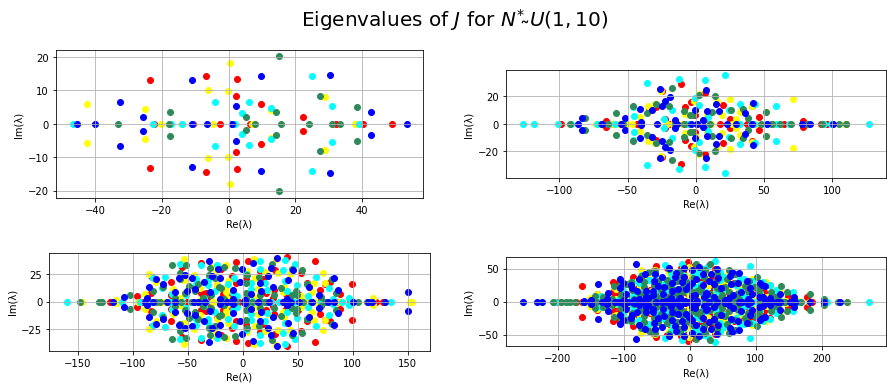

In [7]:
Sr=[20,50,100,200]
colors=["red","yellow","cyan","seagreen","blue"]
fig,ax=plt.subplots(nrows=2, ncols=2,figsize=(15,6))
fig.suptitle("Eigenvalues of $J$ for $N^{*} \\tilde{} \; U(1,10)$", fontsize=20)
for _, s in enumerate(Sr):
    for z in range(5):
        J=makeM(s,C,np.random.normal,param)
        ax[_//2][_%2].scatter(np.real(np.linalg.eigvals(J)), np.imag(np.linalg.eigvals(J)), color=colors[z])
        #ax[_].set_xlim(-150, 150)
        #ax[_].set_ylim(-150, 150)
        ax[_//2][_%2].set_aspect('equal', adjustable='box')
        ax[_//2][_%2].grid()
        ax[_//2][_%2].set_xlabel("Re(λ)")
        ax[_//2][_%2].set_ylabel("Im(λ)")

plt.show()